## Installation
conda install seaborn 

or 

pip install seaborn

## Notes
Seaborn is open-source; hosted on github

It looks really nice.

http://seaborn.pydata.org/api.html
http://seaborn.pydata.org/examples/index.html

We'll use it a lot.

Seaborn comes with some sample datasets that can be loaded.

In [1]:
import seaborn as sns

In [158]:
%matplotlib inline  
# need this  to see visuals in notebook

In [159]:
#load a seaborn sample dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [160]:
sns.set_context('talk')

## Distribution Plots


#### distplot
basically a histogram, for single variable (univariate)

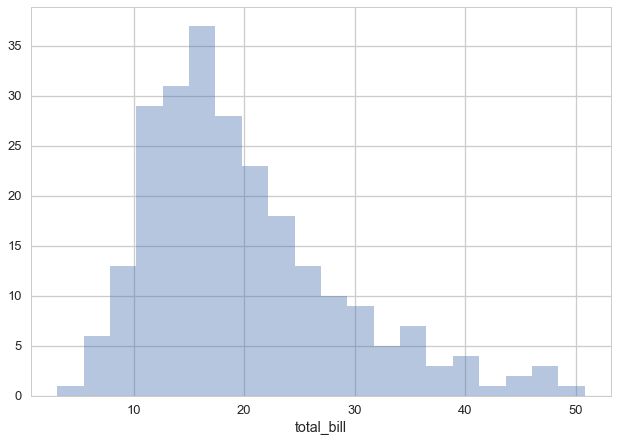

In [161]:
sns.distplot(tips['total_bill'], kde=False, bins=20) 
# kde is a line of the kernel density estimate (turn on/off with true/false)
# Note that when the KDE is on, the y axis shown normalized values, as opposed to raw counts
# hist_kws - can specify characteristics of histogram, like line wdiths



#### jointplot
match up 2 distribution plots for bivariate data

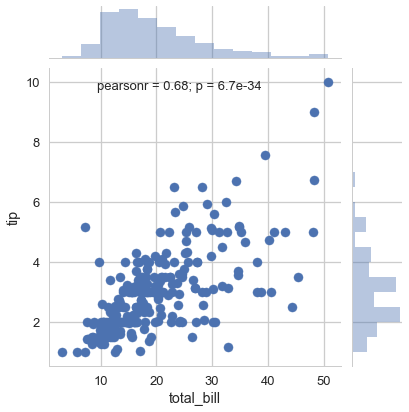

In [162]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind = 'scatter')
# x and y specify the data you want to compare
# data is the dataset name
# kind is the type of output/viz you want (hex, reg, kde; scatter by default)

#shows the pearson coefficient (useful for linear regression)

#### pairplot
plot pair-wise relationships across entire dataframe (for numerical columns)

like multiple jointplots

and also supports color/hue argument for categorical columns


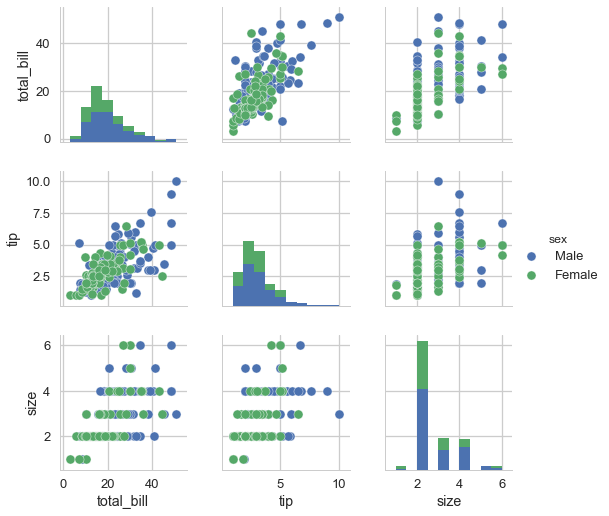

In [163]:
sns.pairplot(tips, hue = 'sex')  # just need to pass in dataframe

# can add argument hue to color the values in a categorical (non-numeric) field

For the diagonal, instead of comparing the same dataset, it provides a histogram

#### rugplot
1-d "ticks" for each datapoint

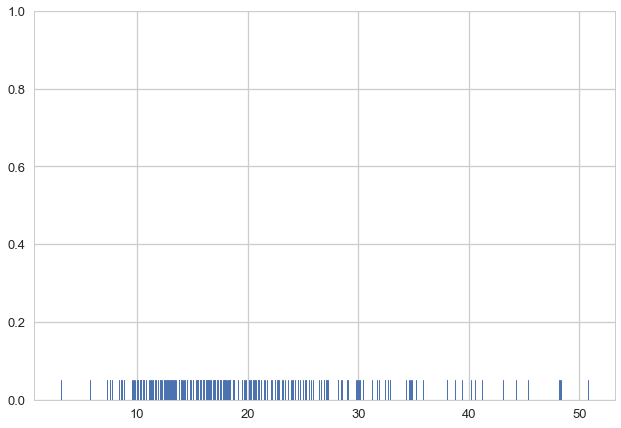

In [164]:
sns.rugplot(tips['total_bill'])

#### kernel density estimate (kde)  
like an aggregate of normal distributions around each data point

(0, 1)

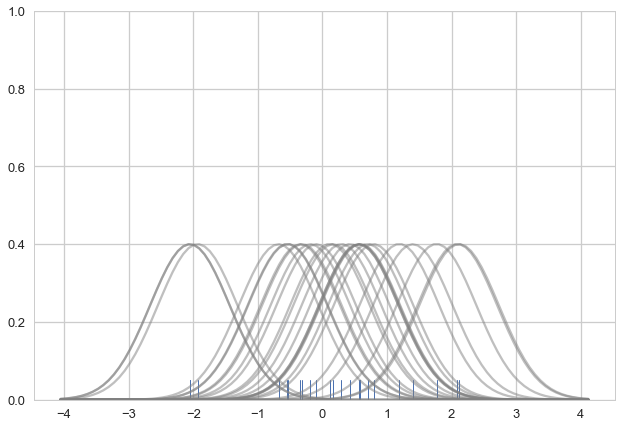

In [165]:
# building from scratch  ; part 1

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# create dataset
dataset = np.random.randn(25)

# create rugplot
#Note: this is not necessary to build the kde, 
#but it helps visualize what's going on - 
# i.e., each point is getting a normal dist around it
sns.rugplot(dataset)

# set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2
x_axis = np.linspace(x_min, x_max, 100) # 100 equally spaces points from x_min to x_max

# set up bandwidth for kernel density estimation
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# create an empty kernel list
kernel_list = []

# plot each basis function
for data_point in dataset:
    # create a kernel (normal dist) for each point and append to list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # scale for plotting
    kernel = kernel/kernel.max()
    kernel = kernel* .4
    plt.plot(x_axis, kernel, color = 'grey', alpha = 0.5)
    
plt.ylim(0,1)



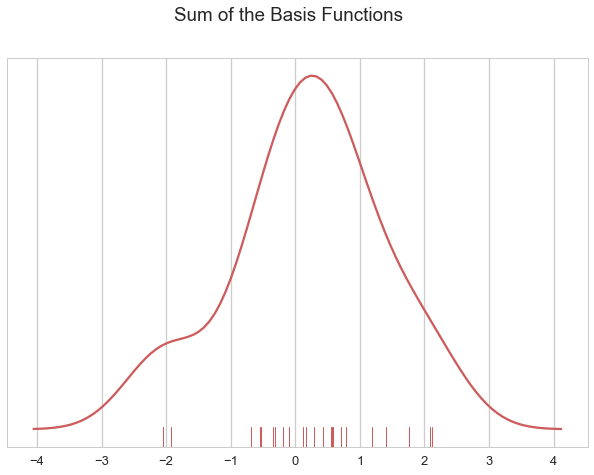

In [166]:
# building from scratch (using rugplot) ; part 2

# plot the sum of the basis functions
sum_of_kde = np.sum(kernel_list, axis=0)

# plot figure
fig = plt.plot(x_axis, sum_of_kde, color='indianred')

# add the initial rugplot
sns.rugplot(dataset, c = 'indianred')

# get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

## Categorical Plots
compare distributions of a (single) varaible under different categories

#### barplot

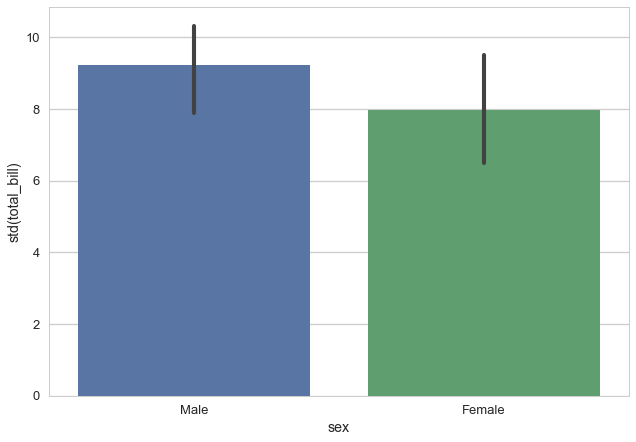

In [167]:
sns.barplot(x='sex',y='total_bill',data = tips, estimator=np.std)
# estimator - i.e., aggregation, by default is mean; can do other functions
# if using numpy functions, need to first import numpy

#### countplot

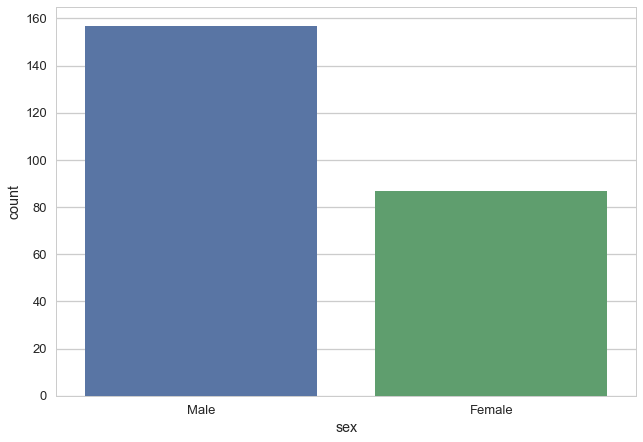

In [168]:
sns.countplot(x='sex', data = tips)

#### boxplot
shows quartiles

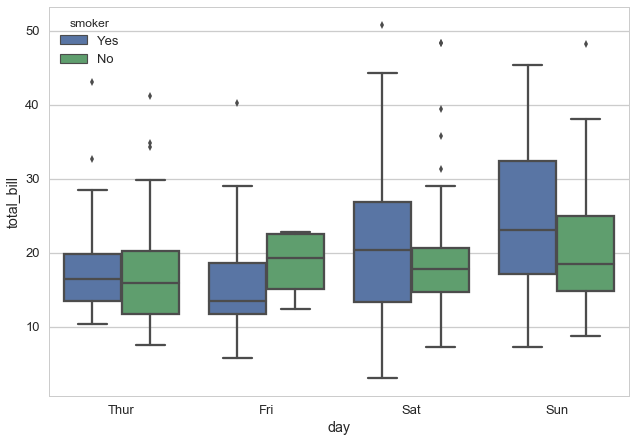

In [169]:
sns.boxplot(x='day',y='total_bill',data=tips, hue = 'smoker')
# x - categorical
# y - quantitative
# hue - (optional) another category split out by color

#### violinplot
like a boxplot, but with distribution (kde)

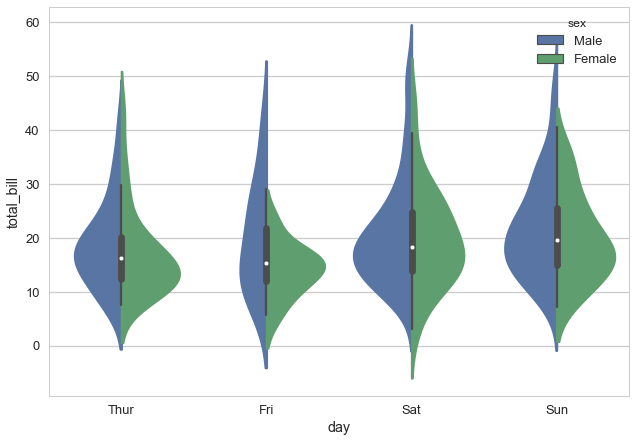

In [170]:
sns.violinplot(x='day', y='total_bill',data=tips, hue='sex',split=True)
# x - categorical
# y - quantitative
# hue - (optional) another category split out by color

#### stripplot
essentially "1-d scatter plots"

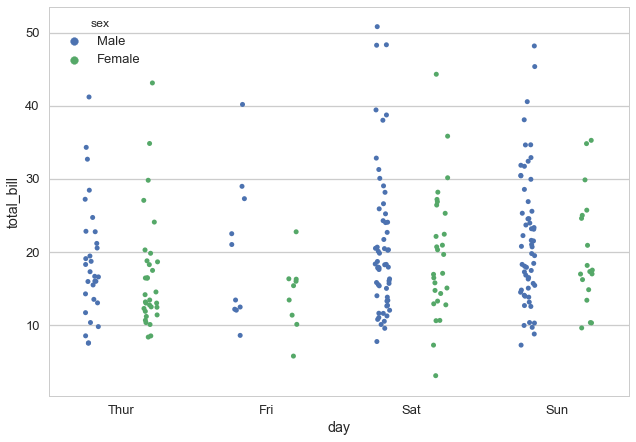

In [171]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex', split=True)
# jitter adds random "noise" horizontally to help see density better

#### swarmplot
like a scatter plot and violin plot combined

Note: might not scale well to larger datasets. Also, most people aren't very familiar

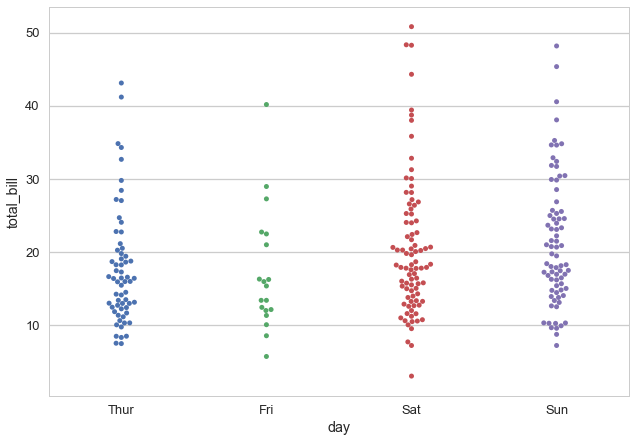

In [172]:
sns.swarmplot(x='day', y='total_bill', data=tips)

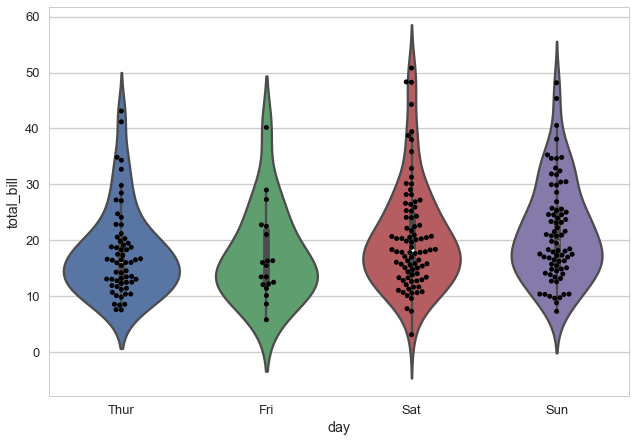

In [173]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='black')

#### factorplot
basically a method to get various types of categorical/distribution plots 
via different "kind"

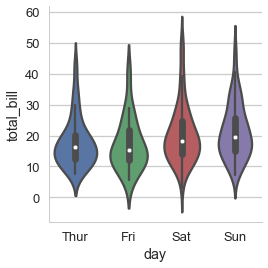

In [174]:
sns.factorplot(x='day', y='total_bill',data=tips, kind='violin')
#various "kinds" - see documentation

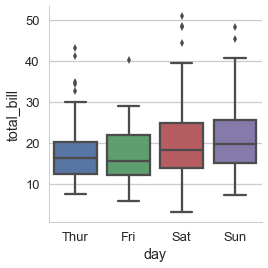

In [175]:
sns.factorplot(x='day', y='total_bill',data=tips, kind='box')
#various "kinds" - see documentation

## Matrix Plots
heat maps

In order for it to work properly, data needs to be in *matrix form* (i.e., both the columns and _rows_ need to be specified variables); one way to do this is doing a pivot

In [176]:
# import another dataset from Seaborn library
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [177]:
# cmap - color gradient options
# annot - label each cell

flights_pivoted = flights.pivot_table(index='month', columns='year',values='passengers')
flights_pivoted

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


#### heatmap

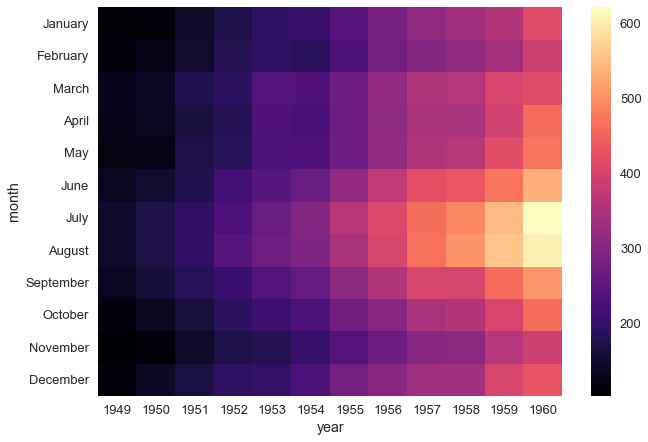

In [178]:
sns.heatmap(flights_pivoted, cmap='magma')
# can also add boundary lines (linecolor and linewidths)
# can re-scale (standard_scale)

#### clustermap
clusters (repositions) columns and rows together based on similarity; shows a hierachy of the clusters

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


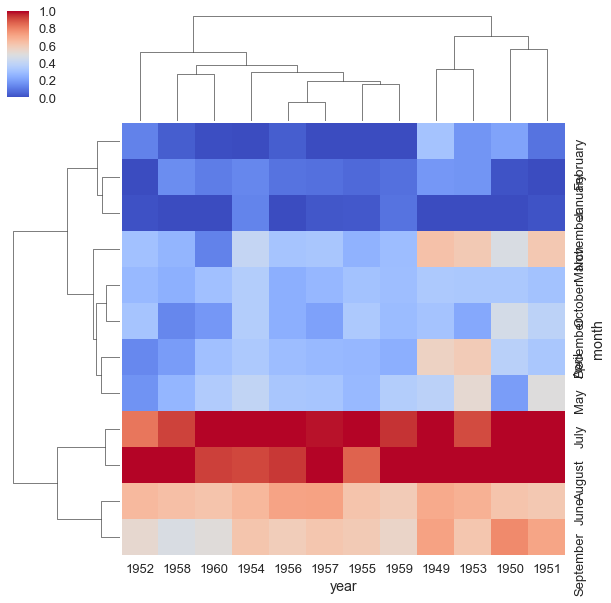

In [179]:
sns.clustermap(flights_pivoted, cmap='coolwarm',standard_scale=1)

## Regression Plots

#### lmplot
linear model plot

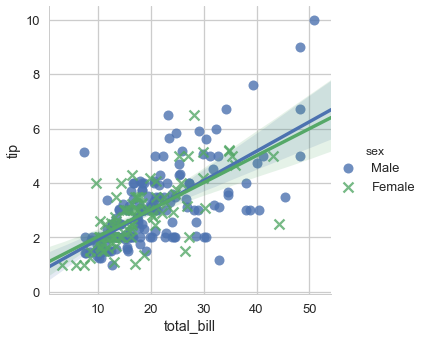

In [180]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','x'],scatter_kws={'s':100})
# scatter_kws={}  allows direct customization of the underlying matplotlib 
# parameters; in this case, marker size
# reference documentation for more info and how to apply to other seaborn plots

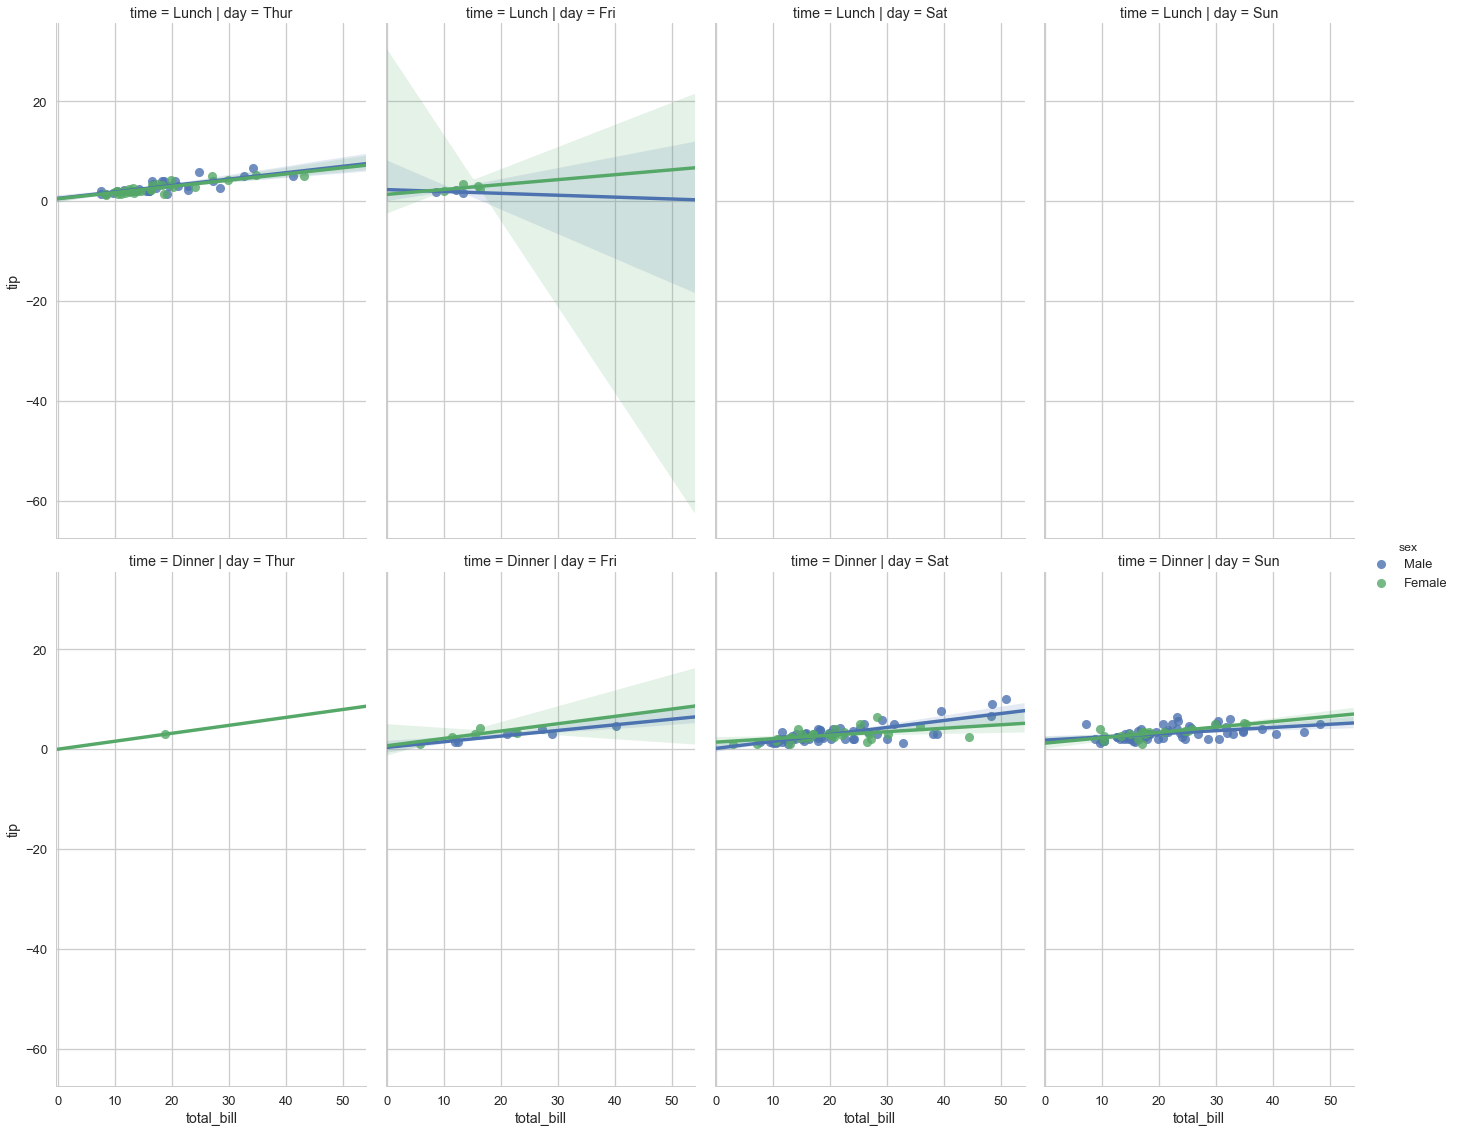

In [181]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day', row='time', hue='sex', 
           aspect=0.6, size=8)
# col and row
# can be used to separate out different classifications  in a grid

## Grids
to automatically create multiple plots ("subplots")

Note: some seaborn plot types have parameters you can pass to turn them into grids

In [182]:
#importing another seaborn sample dataset
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### PairGrid
like pairplot, but only sets up the grid; the rest you have to specify manually
more customizable

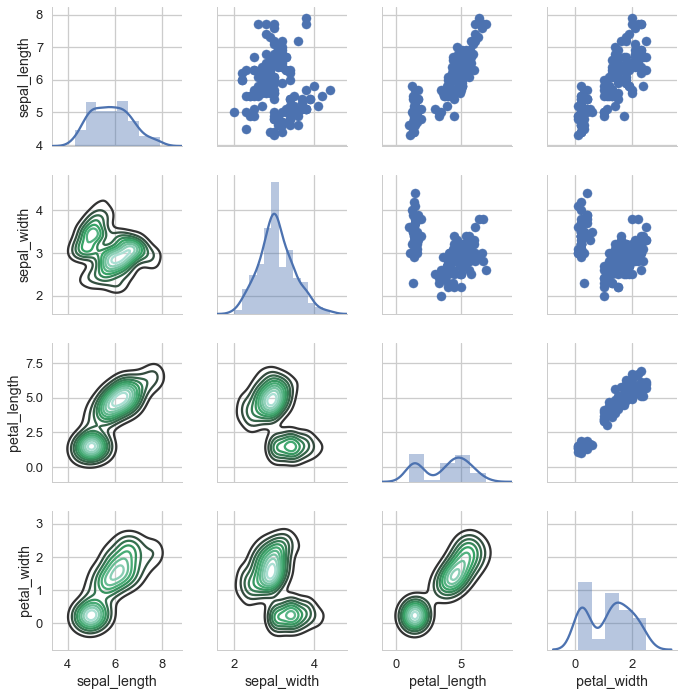

In [183]:
# use map... to specify different parts of the PairGrid, 
# using various seaborn functions to see the data in different ways
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)  
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

#### FacetGrid

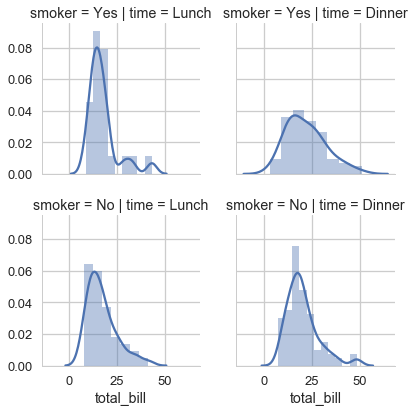

In [184]:
g2 = sns.FacetGrid(data=tips, col='time',row='smoker')
# setting up grid, separated out by categories in 'time' and 'smoker'

g2.map(sns.distplot, 'total_bill')

# specifying plot type distplot, and getting the distribution of total_bill 

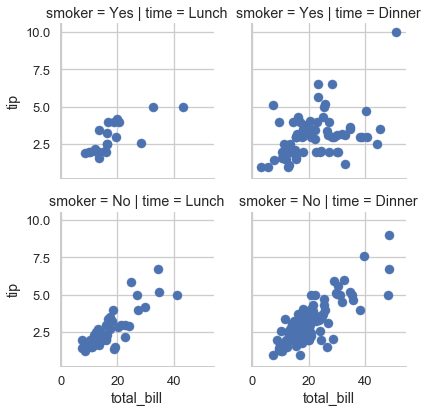

In [185]:
g3 = sns.FacetGrid(data=tips, col='time',row='smoker')
# setting up grid, separated out by categories in 'time' and 'smoker'

g3.map(plt.scatter, 'total_bill', 'tip')

# specifying plot type scatter (from matplotlib), 
# with variables total_bill and tip

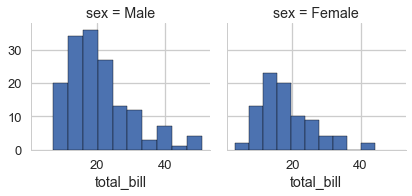

In [186]:
# can pass in arguments for the plot function through map - e.g., for plt.hist edgecolor:
sns.FacetGrid(data=tips, col = 'sex').map(plt.hist,'total_bill', edgecolor='black')


## Style and Color


set_style

can override styles: https://seaborn.pydata.org/tutorial/aesthetics.html

plt.figure

set_context

palette - see matplotlib presets

re: bar lines http://stackoverflow.com/questions/20125199/python-matplotlib-how-can-i-change-the-bars-line-width-for-a-single-bar





#### set_style
preset styles {darkgrid, whitegrid, dark, white, ticks}

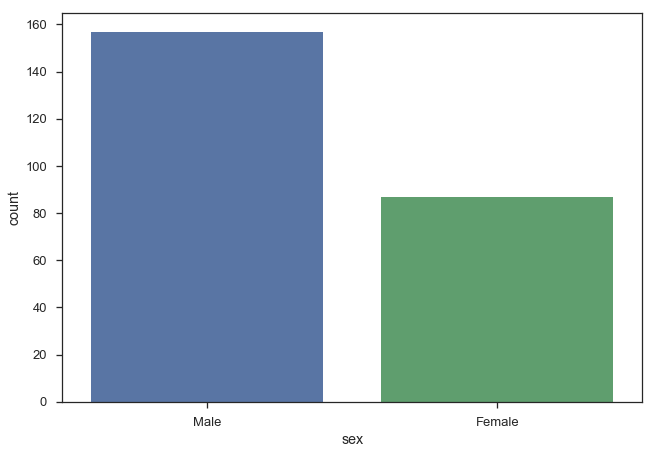

In [187]:
sns.set_style('ticks')
sns.countplot(x='sex', data=tips)

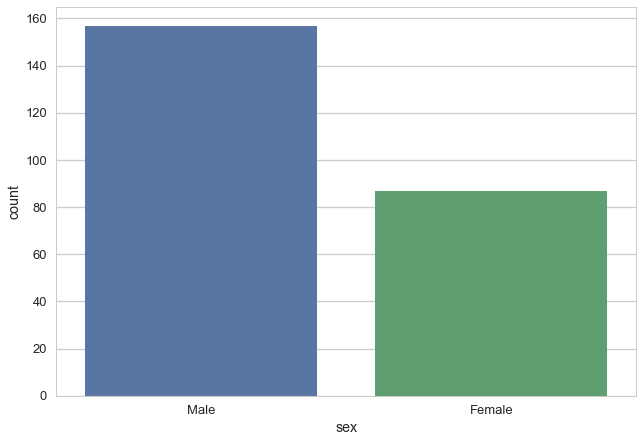

In [188]:
sns.set_style('whitegrid')
sns.countplot(x='sex', data=tips)

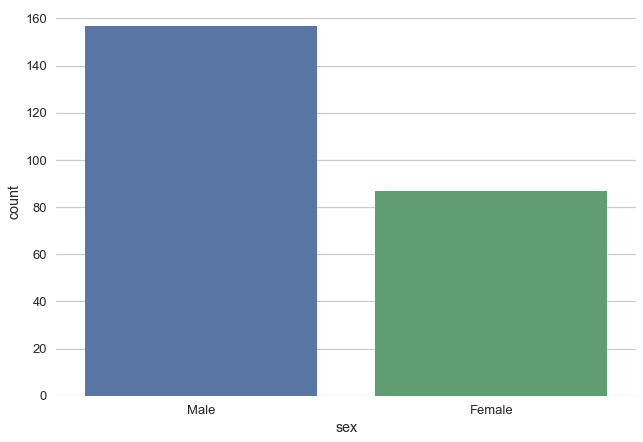

In [189]:
# can use despine 
# to get rid of borders

sns.set_style('whitegrid')
sns.countplot(x='sex', data=tips)
sns.despine(left=True, bottom=True)

#### size aspect etc

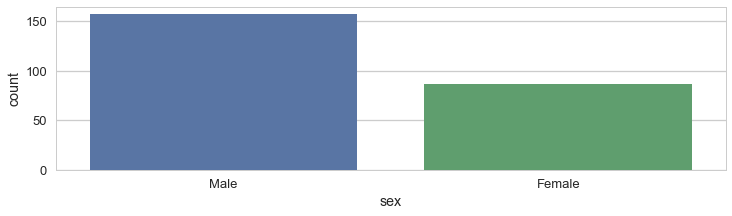

In [190]:
# override matplotlib figure with figsize (and other) parameters 
plt.figure(figsize=(12,3))
sns.countplot(x='sex', data=tips)


In [191]:
# can also do
# plt.title
# plt.xlim , plt.ylim
# set_xlim, set_ylim  - might need to name axes object first
# etc

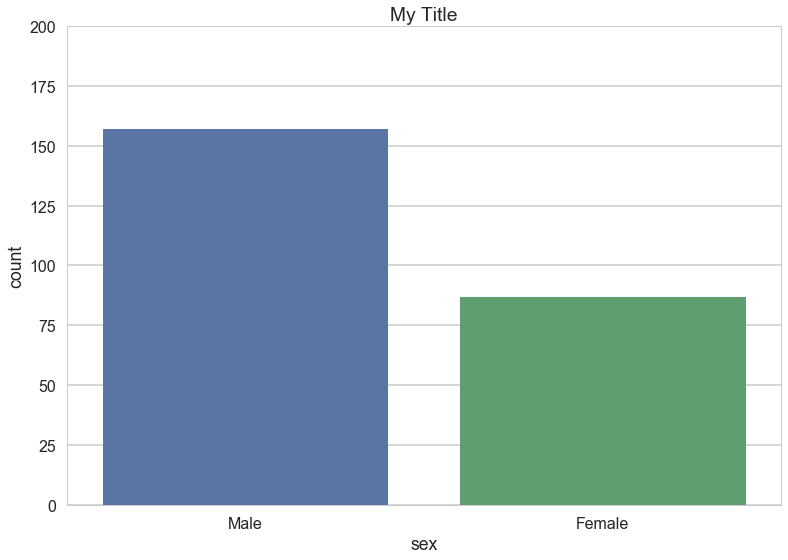

In [192]:
# set_context 
# presets  {paper, notebook, talk, poster}
# can also specify font_scale
sns.set_context('poster')
my_countplot = sns.countplot(x='sex', data=tips)
my_axes = my_countplot.axes
my_axes.set_ylim(0,200)
my_axes.set_title('My Title')


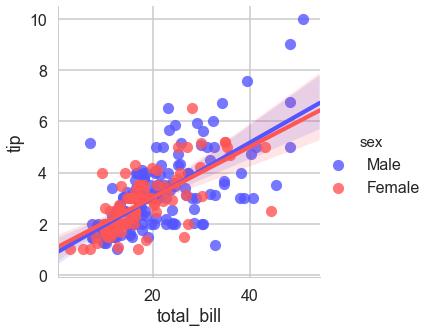

In [193]:
# palette (color scheme)
# see matplotlib presets
sns.lmplot(x='total_bill',y='tip',data =tips,hue='sex',palette='seismic')

Matplotltlib ColorMaps (Color schemes)
https://matplotlib.org/tutorials/colors/colormaps.html

https://gist.githubusercontent.com/endolith/2719900/raw/8c370a18ee266e859a7f9202fd39ab9048282bfd/full%2520list.txt

From cm._cmapnames


Copied from MATLAB:

    autumn 
    bone 
    cool 
    copper 
    flag 
    gray 
    hot 
    hsv 
    jet 
    pink 
    prism 
    spring 
    summer 
    winter 

    (Not copied from MATLAB: colorcube, lines, white)

    These were all added here https://github.com/matplotlib/matplotlib/commit/26ffb47e95d7d694a94bb101d17ebcd0622d15f7


spectral (Spectral is not the same! rename to nipy_spectral?)

    "Tim Leslie's spectral patch"
    https://github.com/matplotlib/matplotlib/commit/b64652d335d4318d1b1a332843837a0c17a4a202
    added after "Spectral"

    from nipy
    http://sourceforge.net/mailarchive/message.php?msg_id=8931272

    Only non-MATLAB colormap to have a post-hoc function

    Related to http://www.math.mcgill.ca/keith/surfstat/doc/SurfStat/spectral.html and http://www.mathworks.com/matlabcentral/fileexchange/4706-mia-2-4/content/mia24/Tools/spectralmni.m but none of these have the same endpoints

    "black-purple-blue-green-yellow-red-white"




Copied from GIST/Yorick:

    # The next 7 palettes are from the Yorick scientific visalisation package,
    # an evolution of the GIST package, both by David H. Munro.

    descriptions here http://dhmunro.github.com/yorick-doc/manual/yorick_70.html http://projects.scipy.org/scipy/browser/trunk/Lib/xplt/gistdata?rev=685

    These palettes tend to start with dark colors and progress toward lighter colors, except yarg and rainbow
    
    gist_earth  "is loosely based on mapmaker's colors from dark blue deep ocean to green lowlands to brown highlands to white mountains" "dk blue - lt blue - dk green - yellow green - lt brown - white sort of like mapmakers colors from deep ocean to snow capped peak"
    gist_gray (identical to gray)
    gist_heat "a red-orange scale resembling the colors of an iron bar as it grows hotter" "dk red - red - orange - yellow  - white	color temperatures of hot iron bar"
    gist_ncar - resembles BkBlAqGrYeOrReViWh200 from National Center for Atmospheric Research
    http://www.ncl.ucar.edu/Document/Graphics/color_table_gallery.shtml
    gist_rainbow "runs through the colors in spectral order at nearly constant intensity" "colors in spectral order"
    gist_stern # red - dk blue - lt blue - gray green - white "Stern special" color table from IDL (c) Research Systems, Inc.
    gist_yarg (identical to gray_r and binary)

    sources here: https://github.com/dhmunro/yorick/tree/master/g
    no explanation of what ncar or stern are for
    'Earlier versions of SkyView used the "Stern Special" color table by default, but we now default to more realistic if less colorful black and white images.'
    'In appearance the most significant change is that by default images are now black and white. Users can select any of the old and many new color tables if desired but we feel that the black and white images most accurately reflect the intensity scaling. Some novice users were confused about the meaning of the colors in the old versions. The old system used the Stern Special color table.'

    In [4]: array_equal(cm.cmap_d['gist_gray'](arange(256)), cm.cmap_d['gray'](arange(256)))
    Out[4]: True

ColorBrewer

    # 34 colormaps based on color specifications and designs
    # developed by Cynthia Brewer (http://colorbrewer.org).
    # The ColorBrewer palettes have been included under the terms
    # of an Apache-stype license (for details, see the file
    # LICENSE_COLORBREWER in the license directory of the matplotlib
    # source distribution).

    Added here https://github.com/matplotlib/matplotlib/commit/31c07815140e97becf2f2e037b8a214e263290b2
    Categorizations here http://rgm2.lab.nig.ac.jp/RGM2/func.php?rd_id=RColorBrewer:ColorBrewer

             maxcolors category

    Diverging
    BrBG            11      div
    PiYG            11      div
    PRGn            11      div
    PuOr            11      div
    RdBu            11      div
    RdGy            11      div
    RdYlBu          11      div
    RdYlGn          11      div
    Spectral        11      div  (not the same as spectral)

    Qualitative (these aren't supposed to be continuous! bug report?)
    Accent           8     qual
    Dark2            8     qual
    Paired          12     qual
    Pastel1          9     qual
    Pastel2          8     qual
    Set1             9     qual
    Set2             8     qual
    Set3            12     qual

    Sequential
    Blues            9      seq
    BuGn             9      seq
    BuPu             9      seq
    GnBu             9      seq
    Greens           9      seq
    Greys            9      seq
    Oranges          9      seq
    OrRd             9      seq
    PuBu             9      seq
    PuBuGn           9      seq
    PuRd             9      seq
    Purples          9      seq
    RdPu             9      seq
    Reds             9      seq
    YlGn             9      seq
    YlGnBu           9      seq
    YlOrBr           9      seq
    YlOrRd           9      seq




cubehelix

    Unlike most other color schemes cubehelix was designed by D.A. Green to
    be monotonically increasing in terms of perceived brightness.
    Also, when printed on a black and white postscript printer, the scheme
    results in a greyscale with monotonically increasing brightness.
    This color scheme is named cubehelix because the r,g,b values produced
    can be visualised as a squashed helix around the diagonal in the
    r,g,b color cube.

    discussion http://sourceforge.net/mailarchive/message.php?msg_id=28065739
    paper http://arxiv.org/abs/1108.5083

    see cm.cubehelix()   (no way to view the docstring?)


coolwarm

    # This bipolar color map was generated from 
    # "Diverging Color Maps for Scientific Visualization" by Kenneth Moreland.
    # <http://www.cs.unm.edu/~kmorel/documents/ColorMaps/>

    Discussion about patch:
    http://sourceforge.net/mailarchive/message.php?msg_id=27816391

    – The map yields images that are aesthetically pleasing.
    – The map has a maximal perceptual resolution.
    – Interference with the shading of 3D surfaces is minimal.
    – The map is not sensitive to vision deficiencies.
    – The order of the colors should be intuitively the same for all people.
    – The perceptual interpolation matches the underlying scalars of the map.

    http://www.cs.unm.edu/~kmorel/documents/ColorMaps/index.html



CMRmap

    Default colormaps on color images often reproduce to confusing grayscale images. The proposed colormap maintains an aesthetically pleasing color image that automatically reproduces to a monotonic grayscale with discrete, quantifiable saturation levels.

    # Implementation of Carey Rappaport's CMRmap.
    # See `A Color Map for Effective Black-and-White Rendering of Color-Scale Images' by Carey Rappaport
    # http://www.mathworks.com/matlabcentral/fileexchange/2662-cmrmap-m


misc others added at the same time

    afmhot - Used in atomic force microscopy?
    brg
    bwr
    gnuplot
    gnuplot2
    ocean
    rainbow
    seismic
    terrain - from "a measurement program called 'Igor'"  http://www.wavemetrics.com/products/igorpro/creatinggraphs/colortab.htm

    all added here: http://sourceforge.net/mailarchive/message.php?msg_id=23330302

    seismic from here? http://soliton.vm.bytemark.co.uk/pub/cpt-city/gery/index.html http://www.mathworks.com/matlabcentral/fileexchange/30585-large-data-in-matlab-a-seismic-data-processing-case-study/content/migration/seismic.m

    afmhot, ocean, rainbow from here? http://gnuplot.sourceforge.net/docs_4.2/node216.html

    apparently AFM because heat is a common palette for atomic force microscopy? https://www.google.com/search?q=atomic+force+microscopy&tbm=isch  "The color selection uses the HSB-color model where the color (H) is set in ° value. The color is selected by entering a number or by clicking a color in the color bar."

binary

    identical to gray_r and gist_yarg

    In [8]: array_equal(cm.cmap_d['binary'](arange(256)), cm.cmap_d['gray_r'](arange(256)))
    Out[8]: True

    added here: https://github.com/matplotlib/matplotlib/commit/47af03d985d9729f3eedc41354fe11a22eff35c4

    meant for barcodes?




identify which are isoluminant/monotonic, sequential/diverging/cyclic/spectral, etc

"sequential (quantitative) variables, discrete (qualitative) variables, and bipolar (diverging) variables"